<a href="https://colab.research.google.com/github/ArpanGyawali/CNN_models/blob/main/VGGFace_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git

  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-h1h651fz
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-h1h651fz
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8325 sha256=b042f17df74b1088239487737c6c9a185f5c67c75020fa1ef162c6e7972c235b
  Stored in directory: /tmp/pip-ephem-wheel-cache-po5fbr20/wheels/08/df/86/0225d44647ab2256dbf1e006823288fe9cc86367a056e6ea2c
Successfully built keras-vggface


In [2]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /usr/local/lib/python3.7/dist-packages
Requires: keras, h5py, numpy, pyyaml, scipy, six, pillow
Required-by: 


In [3]:
!sudo pip install mtcnn

     |████████████████████████████████| 2.3 MB 5.2 MB/s 


In [4]:
!sudo pip install keras_applications


     |████████████████████████████████| 50 kB 3.0 MB/s 


In [6]:
import matplotlib.pyplot as py
import cv2
from PIL import Image
from numpy import asarray, expand_dims
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions


In [7]:
def detect_face(imageFile, required_size=(224, 224)):
  pixels = py.imread(imageFile)
  detector = MTCNN()
  faces =  detector.detect_faces(pixels)
  print(faces)
  x1, y1, width, height = faces[0]['box']   #from botttom left
  x2, y2 = x1 + width, y1 + height
  face_boundary = pixels[y1:y2, x1:x2]
  face_image = cv2.resize(face_boundary, required_size)
  return face_image


[{'box': [85, 96, 270, 358], 'confidence': 0.9950248599052429, 'keypoints': {'left_eye': (154, 244), 'right_eye': (279, 252), 'nose': (200, 314), 'mouth_left': (146, 358), 'mouth_right': (274, 366)}}, {'box': [57, 526, 30, 37], 'confidence': 0.910707414150238, 'keypoints': {'left_eye': (67, 541), 'right_eye': (80, 539), 'nose': (75, 548), 'mouth_left': (68, 556), 'mouth_right': (80, 555)}}]


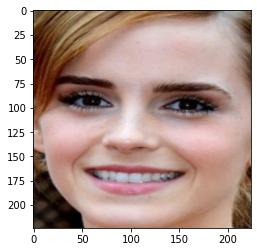

In [8]:
face = detect_face('emma.jpg')
py.imshow(face)

In [9]:
face = face.astype('float32')
face = expand_dims(face, axis = 0)
face = preprocess_input(face, version=2)
model = VGGFace(model='resnet50')
yhat = model.predict(face)
results = decode_predictions(yhat)
for result in results[0]:
  print(result[0][3:-1], result[1]*100)


1359872/1346516 [==============================] - 0s 0us/step
Nina_Watson 97.79692888259888
Ana_Luc\xc3\xada_Dom\xc3\xadnguez 0.9302675724029541
Carlson_Young 0.25222012773156166
Giovanna_Antonelli 0.13655171496793628
Lucy_Watson 0.06548630772158504
